# Inference of tree seqences from variant data

This example is based not on VCF data, but on hte MS format. This is a text-based format where (after some a header) there is one row for each variant. Each row comprises n+2 numbers: one (float) reletive position, one (float) mutation age, and n (integer) genotypes. n is the number of haploid genomes simulated.

I you nderstand this example, you should also be able to infer a tree sequence from a phased VCF file.

List directory contents and navigate to the data directory.

In [1]:
ls sheepTSexample-main

01runScrm1M.sh  LICENSE    README.md   test1M.out.inf.ts   tiny_ts.ts  ts2
02inferTs.py    mySamples  test1M.out  test1M.out.inf.vcf  ts1


In [2]:
cd sheepTSexample-main/

/home/jovyan/sheepTS/sheepTSexample-main


In [3]:
ls

01runScrm1M.sh  LICENSE    README.md   test1M.out.inf.ts   tiny_ts.ts  ts2
02inferTs.py    mySamples  test1M.out  test1M.out.inf.vcf  ts1


Use `subprocess.run()` to inspect simulation data file:

In [5]:
import subprocess

There are 6 header lines before the GT data start:

In [6]:
subprocess.run(["head", "test1M.out"]);

scrm 210 1 -r 4e-2 1e6 -l 0 -I 3 10 100 100 -n 1 67000 -n 2 170000 -n 3 850 -t 23.48e-3 -ej 5000 2 1 -ej 3000 3 2 -p 15 --transpose-segsites
3200528717

//
transposed segsites: 12965
position time 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
0.000108241304339227 35406.149677474 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 

In [7]:
subprocess.run(["tail", "test1M.out"]);

0.999539747925213 4454.09285131029 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0.999673039520905 3702.62025058203 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0.999704269519307 1629.31456158109 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Import data as numpy array

In [10]:
import numpy as np

In [11]:
dat = np.loadtxt("test1M.out", skiprows=6)

What is the type of the array?

In [12]:
type(dat)

numpy.ndarray

What is the data dype of the array elements?

In [13]:
dat.dtype

dtype('float64')

There are two foat columns, the rest is itegers (genotypes).

In [14]:
dat

array([[1.08241304e-04, 3.54061497e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19753979e-04, 2.15010048e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.06747383e-04, 1.72973340e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99915178e-01, 2.81078450e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99940082e-01, 3.30226100e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99988346e-01, 1.85108176e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [15]:
dat.shape

(12965, 212)

Make a separate genotype object (using int16 to save memory):

In [16]:
gts = np.array(dat[:,2:], dtype=np.int16)

In [17]:
gts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [18]:
gts.shape

(12965, 210)

Visualise:

In [19]:
import matplotlib.pyplot as plt

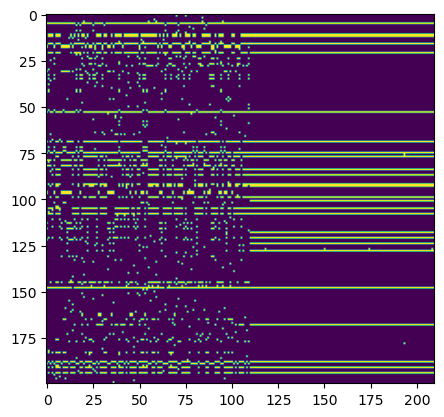

In [20]:
plt.imshow(gts[:200,])
plt.show()

Extract positions and plot histogram.

In [21]:
relPos = dat[:,0]

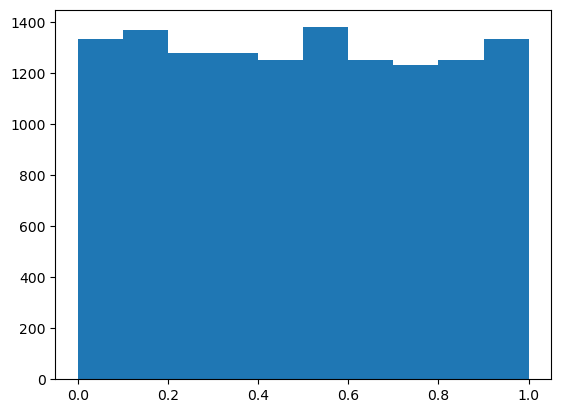

In [22]:
plt.hist(relPos)
plt.show()

Turn into positions along a 1Mbp chromosome:

In [23]:
absPos = relPos * 1_000_000

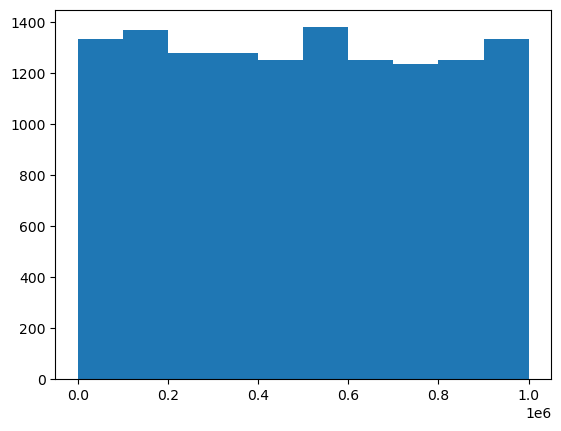

In [24]:
plt.hist(absPos)
plt.show()

In [25]:
absPos

array([1.08241304e+02, 1.19753979e+02, 3.06747383e+02, ...,
       9.99915178e+05, 9.99940082e+05, 9.99988346e+05])

Turn into integers:

In [26]:
absPos = absPos.astype(np.int32)

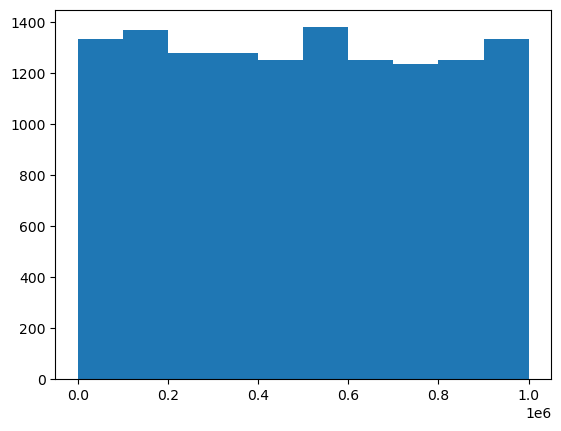

In [27]:
plt.hist(absPos)
plt.show()

Check if there are duplicates

In [28]:
len(absPos.tolist())

12965

In [29]:
len(set(absPos.tolist()))

12885

The set drops duplicated elements. The fact that the set has fewer elements then the original array tells us there are duplicate positions.

In [30]:
absPos.shape[0]

12965

Change duplicated positions by incrementing the 2nd ocurrence:

In [31]:
absPosShift = absPos.copy()
for i in range(1, absPos.shape[0]):
    if absPosShift[i] <= absPosShift[i-1]:
        absPosShift[i] = absPosShift[i-1]+1

In [32]:
absPosShift.shape

(12965,)

In [33]:
len(set(absPosShift.tolist()))

12965

Now both have the same number of elements, so there's no duplication. Good.

## Set up SampleData object

A SampleData object takes the genotype data (plus optional individual and population data and related metadata). This format is smaller than VCF.

In [34]:
import tsinfer

In [35]:
# make sample data object and call is 'samp'
samp = tsinfer.SampleData(
    sequence_length=1e6,
    path="mySamples")

In [36]:
ls -lha

total 14M
drwxr-xr-x. 2 jovyan 1000 4.0K Mar  5 20:56 ./
drwxr-xr-x. 4 jovyan 1000  177 Mar  5 20:56 ../
-rw-r--r--. 1 jovyan 1000  446 Mar  4 10:25 01runScrm1M.sh
-rw-r--r--. 1 jovyan 1000 1.3K Mar  4 10:25 02inferTs.py
-rw-r--r--. 1 jovyan 1000 3.1K Mar  4 10:25 .gitignore
-rw-r--r--. 1 jovyan 1000 1.1K Mar  4 10:25 LICENSE
-rw-r--r--. 1 jovyan 1000 1.0T Mar  5 20:56 mySamples
-rw-r--r--. 1 jovyan 1000 8.0K Mar  5 20:56 mySamples-lock
-rw-r--r--. 1 jovyan 1000 2.9K Mar  4 10:25 README.md
-rw-r--r--. 1 jovyan 1000 5.7M Mar  4 10:25 test1M.out
-rw-r--r--. 1 jovyan 1000 2.5M Mar  4 10:25 test1M.out.inf.ts
-rw-r--r--. 1 jovyan 1000 5.6M Mar  4 10:25 test1M.out.inf.vcf
-rw-r--r--. 1 jovyan 1000 8.2K Mar  4 10:25 tiny_ts.ts
-rw-r--r--. 1 jovyan 1000  11K Mar  4 10:25 ts1
-rw-r--r--. 1 jovyan 1000  11K Mar  4 10:25 ts2


'mySamples' looks rather big, 1TB, but this is empty. The final file will be much smaller.

In [37]:
# add population information (optional)
samp.add_population(metadata={"name": "Mouflon"})
samp.add_population(metadata={"name": "Iranian"})
samp.add_population(metadata={"name": "Border"})

2

In [38]:
# add individuals (optional)

# create a population lookup list to iterate over
popID = np.repeat([0,1,2], [5, 50, 50]).tolist()

for i in range(105):
    samp.add_individual(ploidy=2, population=popID[i])

Inspect what population there are (of course the ones we defined):

In [41]:
list(samp.populations())

[Population(id=0, metadata={'name': 'Mouflon'}),
 Population(id=1, metadata={'name': 'Iranian'}),
 Population(id=2, metadata={'name': 'Border'})]

Add GT data by looping over the number of sites:

In [42]:
for i in range(len(absPosShift)):
    samp.add_site(absPosShift[i], gts[i,:])

Must run `finalise()` before TS inference. This will also write out the SampleData file (if a path was provided when the object was created).

In [43]:
samp.finalise()

In [44]:
ls -lsh

total 14M
4.0K -rw-r--r--. 1 jovyan 1000  446 Mar  4 10:25 01runScrm1M.sh
4.0K -rw-r--r--. 1 jovyan 1000 1.3K Mar  4 10:25 02inferTs.py
4.0K -rw-r--r--. 1 jovyan 1000 1.1K Mar  4 10:25 LICENSE
256K -rw-r--r--. 1 jovyan 1000 256K Mar  5 21:00 mySamples
4.0K -rw-r--r--. 1 jovyan 1000 2.9K Mar  4 10:25 README.md
5.7M -rw-r--r--. 1 jovyan 1000 5.7M Mar  4 10:25 test1M.out
2.5M -rw-r--r--. 1 jovyan 1000 2.5M Mar  4 10:25 test1M.out.inf.ts
5.6M -rw-r--r--. 1 jovyan 1000 5.6M Mar  4 10:25 test1M.out.inf.vcf
 12K -rw-r--r--. 1 jovyan 1000 8.2K Mar  4 10:25 tiny_ts.ts
 12K -rw-r--r--. 1 jovyan 1000  11K Mar  4 10:25 ts1
 12K -rw-r--r--. 1 jovyan 1000  11K Mar  4 10:25 ts2


Now the mySamples file turns out to be smalle, 256Kb, much smalle then the corresponding VCF file (5.6MB).

## TS Inference

In [46]:
# use the time library to measure running time
import time

In [47]:
t0 = time.time()
ts = tsinfer.infer(samp)
time.time() - t0

29.560572385787964

About 30s on the online notebook (about 20s on my laptop).

Use `simplify()` to remove clutter (i.e. uniary nodes and unnecessary ancestral sequneces).

In [48]:
ts = ts.simplify()

In [49]:
ts

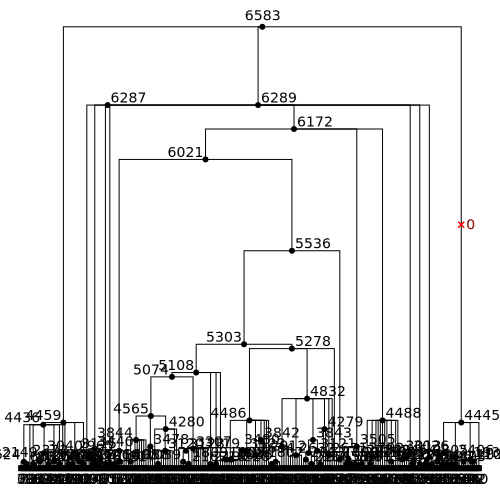

In [50]:
ts.at(110).draw_svg(size=(500,500))

## TS with wrongly inferred ancestral states

In [52]:
import tskit

In [53]:
import random

In [54]:
len(absPosShift)

12965

In [55]:
random.random() < 0.1

False

Randomly swap about 10% of ancestral states.

In [56]:
swapIndex = [random.random() < 0.1 for i in range(len(absPosShift))]

Make a new SampleData object (this time we don't give it a path and do everything in memory).

In [58]:
samp2 = tsinfer.SampleData(sequence_length=1e6)

In [59]:
int(swapIndex[1])

0

In [60]:
for i in range(len(absPosShift)):
    samp2.add_site(absPosShift[i], gts[i,:],ancestral_allele=int(swapIndex[i]))

In [61]:
samp2.finalise()

In [62]:
ts2 = tsinfer.infer(samp2)

In [63]:
ts=ts.simplify()

In [64]:
ts2=ts2.simplify()

Do the two TSs differ?

In [65]:
ts

In [66]:
ts2

Yes, the one with some wrong ancestral alleles has more trees, more edges, more nodes and is somewhat bigger.

Are popgen stats affected?

In [151]:
ts.diversity([range(10), range(10,110), range(110,210)]) * 100

array([0.15704   , 0.16710796, 0.00182616])

In [152]:
ts2.diversity([range(10), range(10,110), range(110,210)]) * 100

array([0.15704   , 0.16710796, 0.00182616])

Not diversity (when computed on sites).

In [154]:
ts.Fst([range(10), range(200, 210)])

0.38574181117530415

In [155]:
ts2.Fst([range(10), range(200, 210)], )

0.38574181117530415

Not $F_{ST}$ (when computed on sites).

In [156]:
ts.genealogical_nearest_neighbours([0], [range(10), range(10,110), range(110, 210)])

array([[0.60255102, 0.36445776, 0.03299123]])

In [157]:
ts2.genealogical_nearest_neighbours([0], [range(10), range(10,110), range(110, 210)])

array([[0.60313795, 0.36786518, 0.02899687]])

But GNN changes somewhat.

The polarise (i.e. un-folded) site-frequency spectrum also differs:

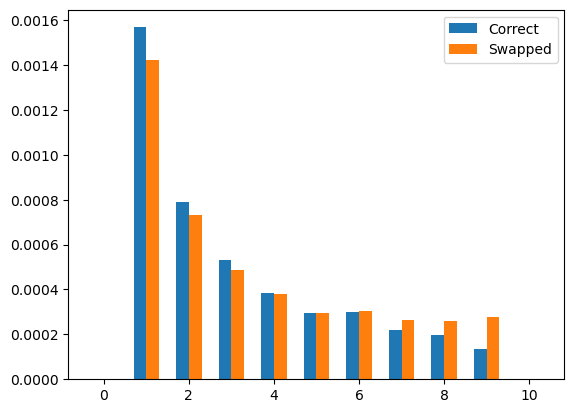

In [67]:
#plt.figure(figsize=(,4))
plt.bar(np.array(range(11))-.15, ts.simplify(range(10)).allele_frequency_spectrum(polarised=True), width=.3, label="Correct")
plt.bar(np.array(range(11))+.15, ts2.simplify(range(10)).allele_frequency_spectrum(polarised=True), width=.3, label="Swapped")
plt.legend()
plt.show()